# Quality control routines for PNBOIA

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

import matplotlib.pyplot as plt

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import os
os.chdir('/home/remobs-dados/PNBOIA/pnboia_qc/pnboia_qc')
import pnboia_limits_tests
from lims_gen import *

# %load_ext autoreload
# %autoreload 2

## Load data

In [11]:
data_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'
os.chdir(data_path)

In [12]:
# Raw
buoys_df_raw = pd.read_csv('pnboia_raw_data.csv',parse_dates=True)
buoys_df_raw.rename(columns={'humi':'rh', # variables temporarily renamed to match QCChecks limits naming
                        'dewp':'dewpt',
                        'wtmp':'sst',
                        'cvel1':'cspd1',
                        'cvel2':'cspd2',
                        'cvel3':'cspd3',
                        'wvht':'swvht',
                        'wmax':'mxwvht',
                        'dpd':'tp',
                        'mwd':'wvdir',
                        'spred':'wvspread'}, inplace=True)
buoys_df_raw.drop(columns=['lat','lon'],inplace=True)

names = {'cf':'cabofrio',
        'cf2':'cabofrio2',
        'fo':'fortaleza',
        'it':'itajai_0',
        'ni':'niteroi',
        'po':'porto_seguro', 
        're':'recife',
        'rg':'rio_grande', 
        'sa':'santos', 
        'vi':'vitoria'}


buoys_df_raw['buoy'] = buoys_df_raw['buoy'].replace(names)
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# Site
buoys_df_site = pd.read_csv('pnboia_site_data.csv',parse_dates=['Datetime'],index_col=['buoy','Datetime'])
buoys_df_site.sort_index(inplace=True)

# Get buoys names
buoys_site = buoys_df_site.reset_index().loc[:,'buoy'].unique()

params_rename = {
                    'Cvel1':'cspd1',
                    'Cvel2':'cspd1',
                    'Cvel3':'cspd1',
                    'Dewp':'dewpt',
                    'Dpd':'tp',
                    'Gust':'gust',
                    'Humi':'rh',
                    'Pres':'pres',
                    'Pressao_Atm':'pres',
                    'Rad_Solar':'arad',
                    'Salinidade':'sss',
                    'Temp_Agua':'sst',
                    'Temp_Ar':'atmp',
                    'Umidade':'rh',
                    'Velocidade_Vento':'wspd',
                    'Wmax':'mxwvht',
                    'Wspd':'wspd',
                    'Wtmp':'sst',
                    'Wvht':'swvht',
                    'dpd':'tp',
                    'wvht':'swvht',
                    'Direcao_Vento':'wdir',
                    'Wdir':'wdir',
                    'Atmp':'atmp'
                 }

buoys_df_site.rename(columns=params_rename,inplace=True)

# Reference buoys names
ref_buoys = ['fortaleza','itaguai_1','itajai_0','itaoca','niteroi_0',
             'cabofrio','portoseguro_0','recife_0','riogrande_0',
             'santos','vitoria_0']

## Limits

### From pnboia_limits_tests.py

In [13]:
general_lims = pnboia_limits_tests.general
cabofrio_lims = pnboia_limits_tests.cabofrio
itaguai_lims = pnboia_limits_tests.itaguai
itajai_lims = pnboia_limits_tests.itajai
itaoca_lims = pnboia_limits_tests.itaoca
niteroi_lims = pnboia_limits_tests.niteroi
porto_seguro_lims = pnboia_limits_tests.porto_seguro
recife_lims = pnboia_limits_tests.recife
rio_grande_lims = pnboia_limits_tests.rio_grande
santos_lims = pnboia_limits_tests.santos
vitoria_lims = pnboia_limits_tests.vitoria

tests_limits_list = ['mis_value_axys_limits','range_axys_limits',
                    'climate_axys_limits','stuck_axys_limits',
                    'continuity_axys_limits']

### Generated

In [14]:
out_lims_df = gen_outlier_lim(buoys_df_site,std_factor=6).loc[ref_buoys]
cont_lims_df = gen_cont_lims(buoys_df_site,std_factor=3.).loc[ref_buoys]

In [15]:
out_lims_df.index.levels[1].unique()

Index(['Condutividade', 'arad', 'atmp', 'cspd1', 'cspd2', 'cspd3', 'dewpt',
       'gust1', 'mxwvht', 'mxwvht1', 'pres', 'rh', 'sss', 'sst', 'swvht',
       'swvht1', 'swvht2', 'tp', 'tp1', 'tp2', 'wspd1', 'wtmp', 'wvdir2',
       'wvspread1'],
      dtype='object', name='param')

## Tests

In [16]:
santos = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims)

mis_value_check done.
range_check done.
range_check_climate done.


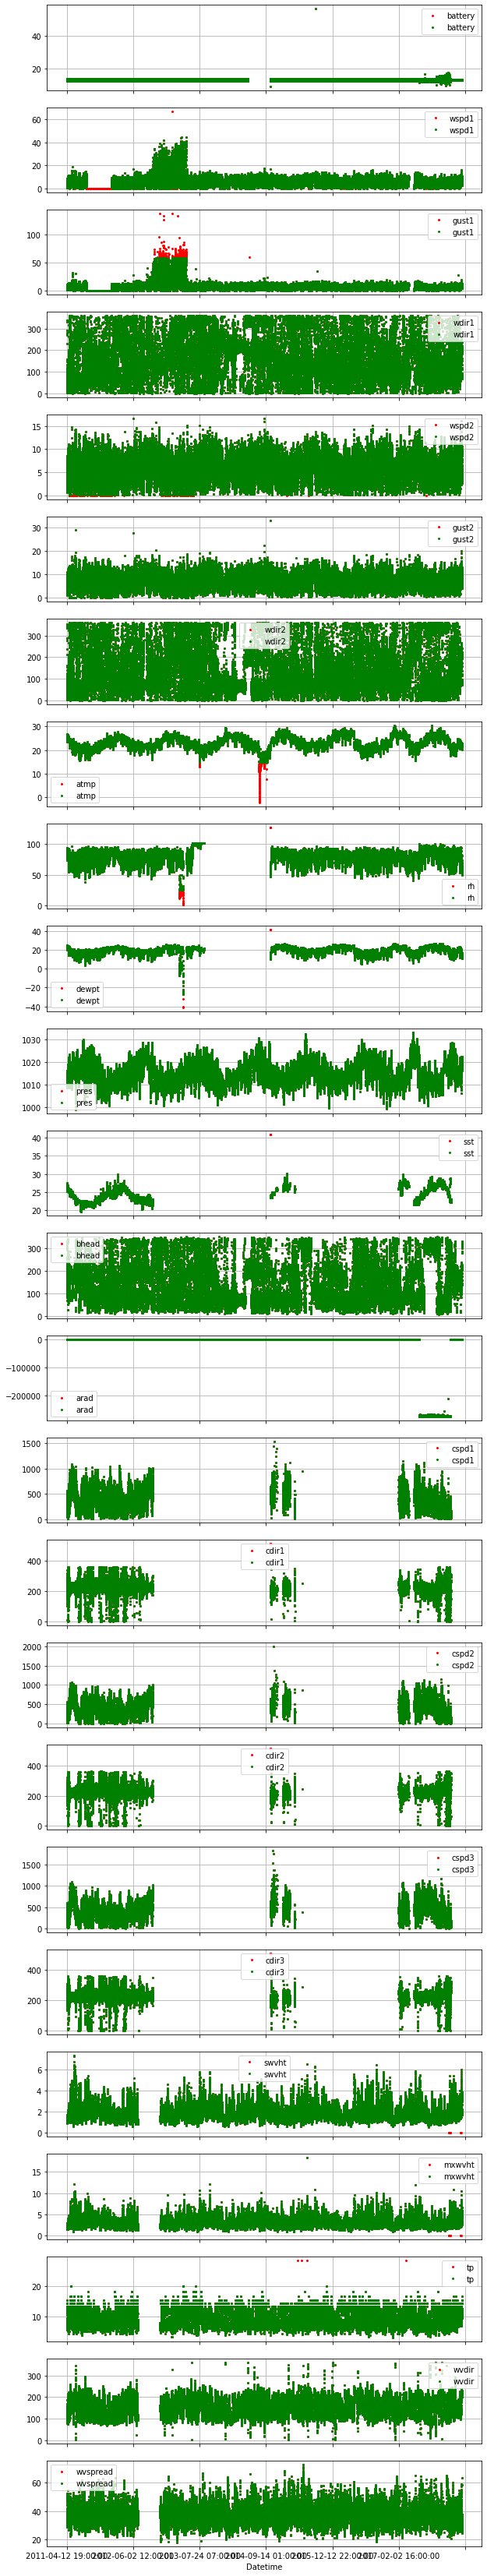

In [25]:
params_raw = buoys_df_raw.loc[buoy].columns
fig, ax = plt.subplots(len(params_raw),1,sharex=True,figsize=(10,60))
buoys_df_raw.loc[buoy,params_raw].plot(subplots=True,color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax);
santos.plot(subplots=True,color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax);